# Assignment 6 - 2D Arrays



**Q1. A permutation perm of n + 1 integers of all the integers in the range [0, n] can be represented as a string s of length n where:**

- s[i] == 'I' if perm[i] < perm[i + 1], and
- s[i] == 'D' if perm[i] > perm[i + 1].

Given a string s, reconstruct the permutation perm and return it. If there are multiple valid permutations perm, return **any of them**.

**Example 1:**

**Input:** s = "IDID"

**Output:**

[0,4,1,3,2]

</aside>

In [1]:
def findPermutation(s):
    n = len(s)
    perm = []
    low, high = 0, n

    for ch in s:
        if ch == 'I':
            perm.append(low)
            low += 1
        elif ch == 'D':
            perm.append(high)
            high -= 1

    perm.append(low)
    return perm

In [2]:
s = "IDID"
print(findPermutation(s))

[0, 4, 1, 3, 2]


**Q2. You are given an m x n integer matrix matrix with the following two properties:**

- Each row is sorted in non-decreasing order.
- The first integer of each row is greater than the last integer of the previous row.

Given an integer target, return true *if* target *is in* matrix *or* false *otherwise*.

You must write a solution in O(log(m * n)) time complexity.

Example 1:
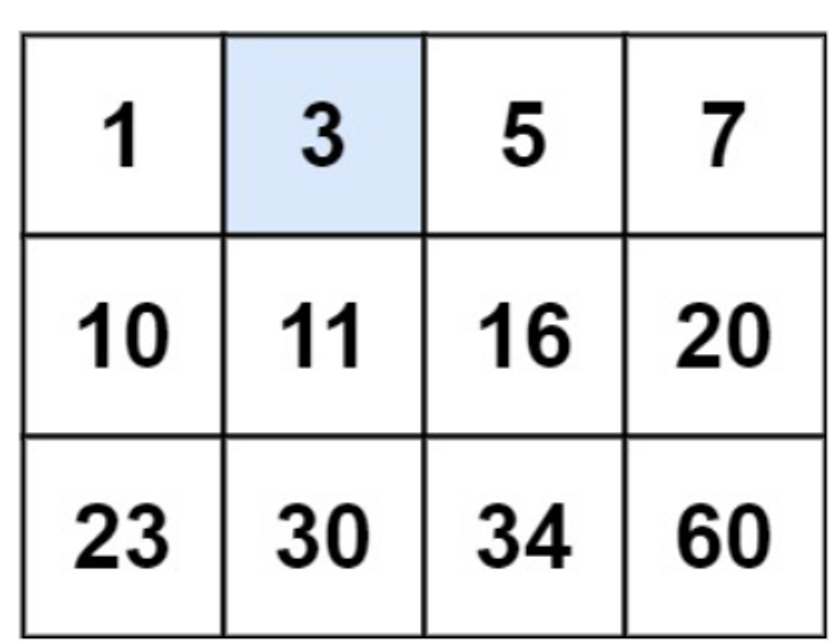

**Input:** matrix = [[1,3,5,7],[10,11,16,20],[23,30,34,60]], target = 3

**Output:** true


In [3]:
def searchMatrix(matrix, target):
    m, n = len(matrix), len(matrix[0])
    left, right = 0, m * n - 1

    while left <= right:
        mid = left + (right - left) // 2
        row = mid // n
        col = mid % n

        if matrix[row][col] == target:
            return True
        elif matrix[row][col] < target:
            left = mid + 1
        else:
            right = mid - 1

    return False

In [4]:
matrix = [
    [1, 3, 5, 7],
    [10, 11, 16, 20],
    [23, 30, 34, 60]
]
target = 3

print(searchMatrix(matrix, target))

True


**Q3. Given an array of integers arr, return *true if and only if it is a valid mountain array*. Recall that arr is a mountain array if and only if:**

- arr.length >= 3
- There exists some i with 0 < i < arr.length - 1 such that:
    - arr[0] < arr[1] < ... < arr[i - 1] < arr[i]
    - arr[i] > arr[i + 1] > ... > arr[arr.length - 1]
</aside> 

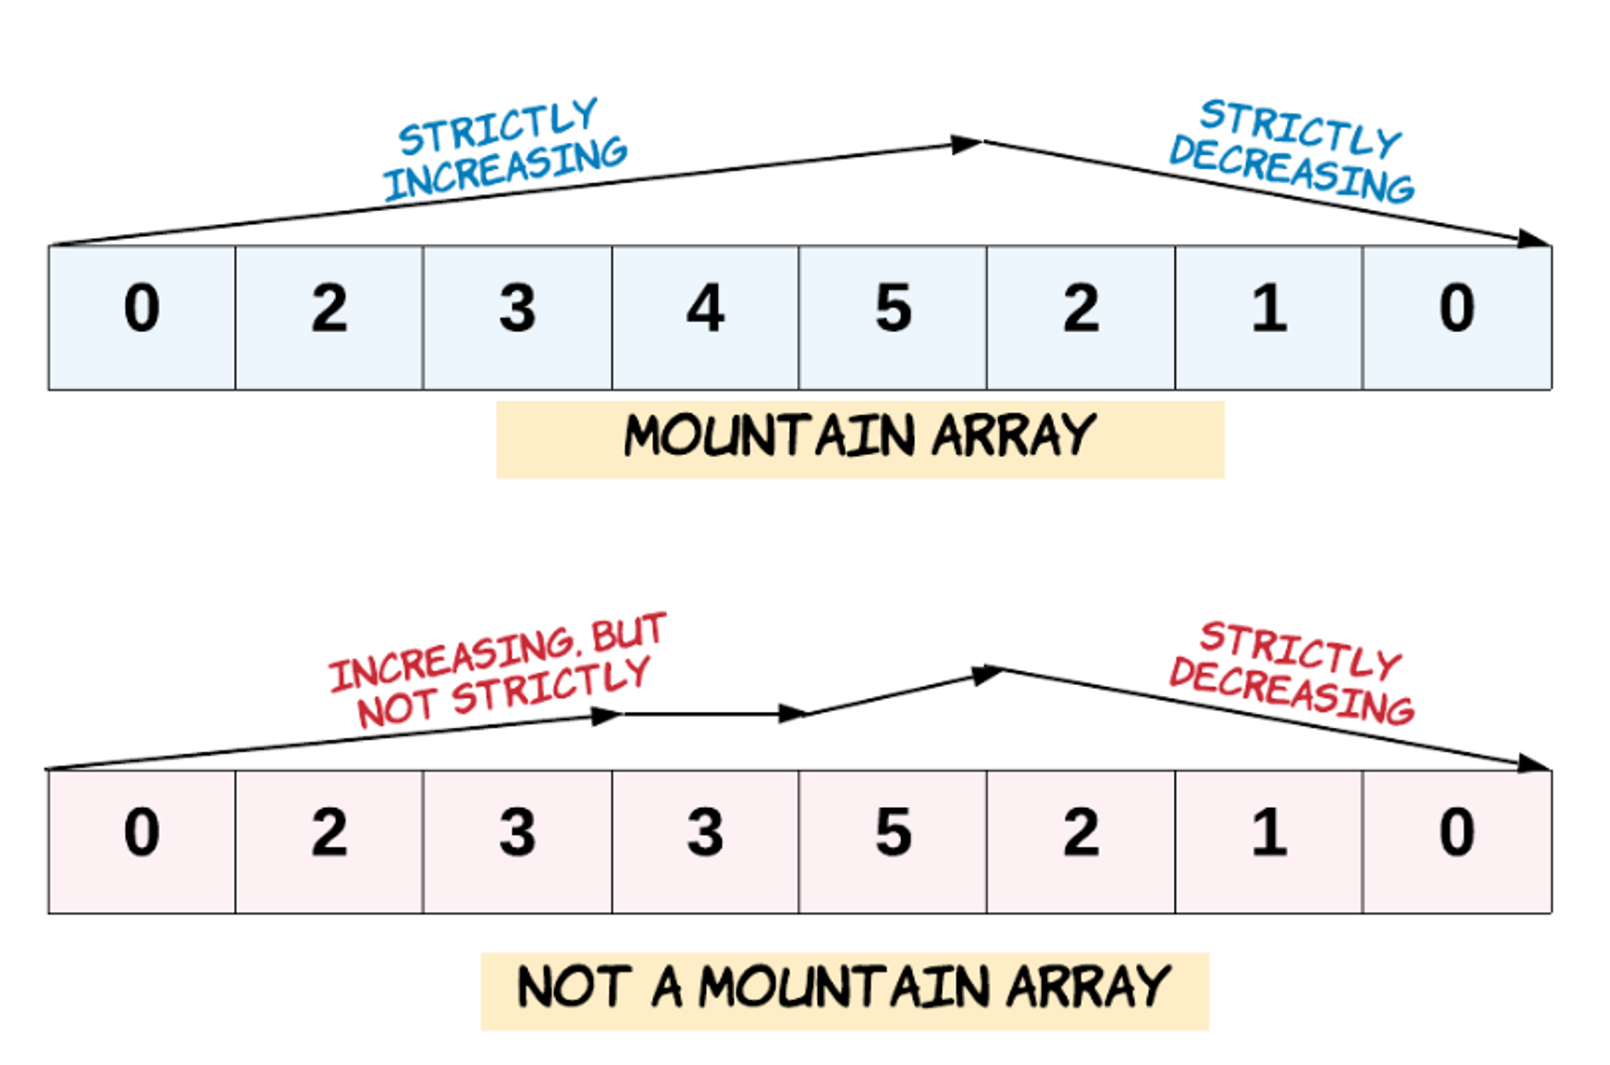

**Example 1:**

**Input:** arr = [2,1]

**Output:**

false

In [5]:
def valid_mountain_array(arr):
    if len(arr) < 3:
        return False

    i = 0
    while i < len(arr) - 1 and arr[i] < arr[i + 1]:
        i += 1

    if i == 0 or i == len(arr) - 1:
        return False

    while i < len(arr) - 1 and arr[i] > arr[i + 1]:
        i += 1

    return i == len(arr) - 1

In [6]:
valid_mountain_array([2,3,4])

False

**Q4. Given a binary array nums, return *the maximum length of a contiguous subarray with an equal number of* 0 *and* 1.**

**Example 1:**

**Input:** nums = [0,1]

**Output:** 2

**Explanation:**

[0, 1] is the longest contiguous subarray with an equal number of 0 and 1.

In [7]:
def findMaxLength(nums):
    max_length = 0
    sum_dict = {0: -1}
    sum = 0

    for i in range(len(nums)):
        if nums[i] == 1:
            sum += 1
        else:
            sum -= 1

        if sum in sum_dict:
            length = i - sum_dict[sum]
            if length > max_length:
                max_length = length
        else:
            sum_dict[sum] = i

    return max_length

In [8]:
nums = [0, 1]
result = findMaxLength(nums)
print(result)

2


**Q5. The **product sum** of two equal-length arrays a and b is equal to the sum of a[i] * b[i] for all 0 <= i < a.length (**0-indexed**).**
- For example, if a = [1,2,3,4] and b = [5,2,3,1], the **product sum** would be 1*5 + 2*2 + 3*3 + 4*1 = 22.

Given two arrays nums1 and nums2 of length n, return *the **minimum product sum** if you are allowed to **rearrange** the **order** of the elements in* nums1.

**Example 1:**

**Input:** nums1 = [5,3,4,2], nums2 = [4,2,2,5]

**Output:** 40

**Explanation:**

We can rearrange nums1 to become [3,5,4,2]. The product sum of [3,5,4,2] and [4,2,2,5] is 3*4 + 5*2 + 4*2 + 2*5 = 40.


In [9]:
def minProductSum(nums1, nums2):
    nums1.sort()
    nums2.sort(reverse=True)

    min_product_sum = 0
    for i in range(len(nums1)):
        min_product_sum += nums1[i] * nums2[i]

    return min_product_sum

In [10]:
nums1 = [5, 3, 4, 2]
nums2 = [4, 2, 2, 5]
result = minProductSum(nums1, nums2)
print(result)

40


**Q6. An integer array original is transformed into a **doubled** array changed by appending **twice the value** of every element in original, and then randomly **shuffling** the resulting array.**

Given an array changed, return original *if* changed *is a **doubled** array. If* changed *is not a **doubled** array, return an empty array. The elements in* original *may be returned in **any** order*.

**Example 1:**

**Input:** changed = [1,3,4,2,6,8]

**Output:** [1,3,4]

**Explanation:** One possible original array could be [1,3,4]:

- Twice the value of 1 is 1 * 2 = 2.
- Twice the value of 3 is 3 * 2 = 6.
- Twice the value of 4 is 4 * 2 = 8.

Other original arrays could be [4,3,1] or [3,1,4].


In [11]:
from typing import List

def findOriginalArray(changed: List[int]) -> List[int]:
    if len(changed) % 2 != 0:
        return []

    count = {}
    for num in changed:
        count[num] = count.get(num, 0) + 1

    original = []
    for num in sorted(changed):
        if count.get(num, 0) == 0:
            continue
        if count.get(num * 2, 0) == 0:
            return []
        original.append(num)
        count[num] -= 1
        count[num * 2] -= 1

    return original

In [12]:
changed = [1, 3, 4, 2, 6, 8]
original = findOriginalArray(changed)
print(original)

[1, 3, 4]


**Q7. Given a positive integer n, generate an n x n matrix filled with elements from 1 to n2 in spiral order**

**Example 1:**
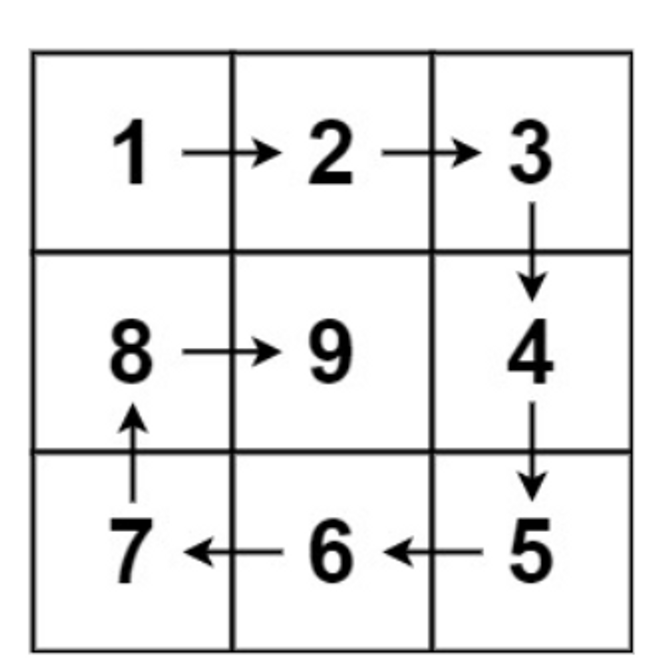

**Input:** n = 3

**Output:** [[1,2,3],[8,9,4],[7,6,5]]

In [13]:
from typing import List

def generateMatrix(n: int) -> List[List[int]]:
    matrix = []
    total = n * n
    for i in range(1, total + 1):
        matrix.append(i)
    result = [[None] * n for _ in range(n)]

    for d in range(n - 1):
        for i in range(d, n - d - 1):
            result[d][i] = matrix.pop(0)
        for i in range(d, n - d - 1):
            result[i][n - d - 1] = matrix.pop(0)
        for i in range(n - d - 1, d, -1):
            result[n - d - 1][i] = matrix.pop(0)
        for i in range(n - d - 1, d, -1):
            result[i][d] = matrix.pop(0)
    
    if n % 2:
        x = (n - 1) // 2
        result[x][x] = matrix.pop()

    return result

In [14]:
n = 3
result = generateMatrix(n)
print(result)

[[1, 2, 3], [8, 9, 4], [7, 6, 5]]


**Q8. Given two [sparse matrices](https://en.wikipedia.org/wiki/Sparse_matrix) mat1 of size m x k and mat2 of size k x n, return the result of mat1 x mat2. You may assume that multiplication is always possible.**

Example 1:

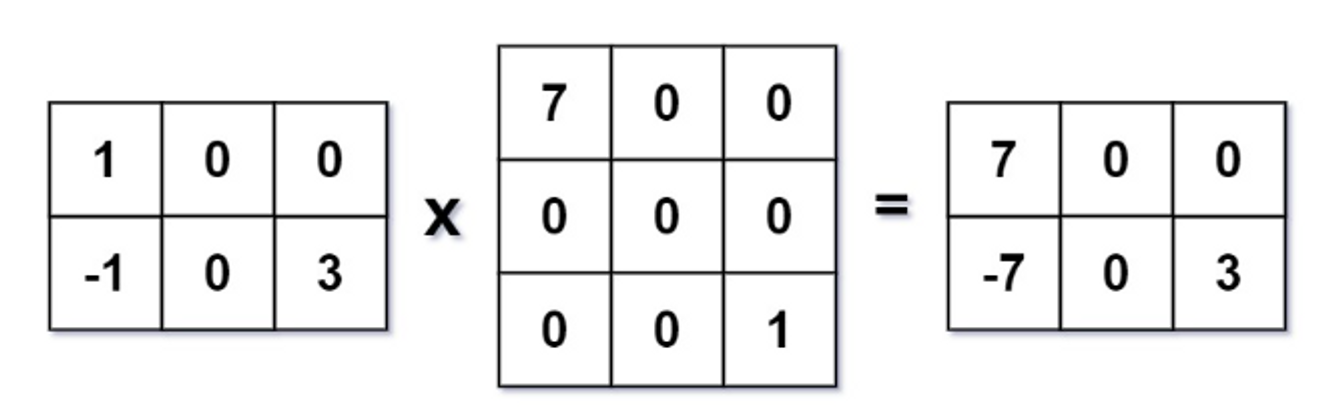

**Input:** mat1 = [[1,0,0],[-1,0,3]], mat2 = [[7,0,0],[0,0,0],[0,0,1]]

**Output:**

[[7,0,0],[-7,0,3]]

In [15]:
def multiply(mat1, mat2):
    m, k = len(mat1), len(mat1[0])
    k2, n = len(mat2), len(mat2[0])

    result = [[0] * n for _ in range(m)]

    for i in range(m):
        for j in range(k):
            if mat1[i][j] != 0:
                for col in range(n):
                    result[i][col] += mat1[i][j] * mat2[j][col]

    return result

In [16]:
mat1 = [[1, 0, 0], [-1, 0, 3]]
mat2 = [[7, 0, 0], [0, 0, 0], [0, 0, 1]]

result = multiply(mat1, mat2)
for row in result:
    print(row)

[7, 0, 0]
[-7, 0, 3]
